A:\Python\Anaconda3.5\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


9,8,5,2,3시간 공부했을 때 예측 점수  [[90.55687 ]
 [83.81566 ]
 [63.59201 ]
 [43.36837 ]
 [50.109585]]


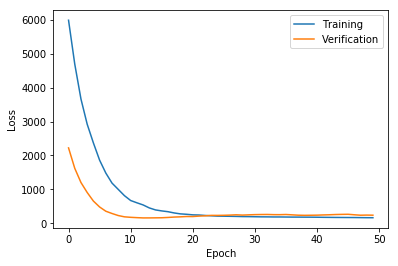

In [3]:
##############################################
# Modeling
##############################################
from keras import layers, models
from sklearn import preprocessing
import pandas as pd, numpy as np

def ANN_seq_func(Nin, Nh, Nout):
    # Keras 모델 시작
    model = models.Sequential()
    
    # 입력 계층 노드 수 Nin 개,  은닉 계층의 노드 수 Nh 개, 활성함수는 relu
    model.add(layers.Dense(Nout, input_shape=(Nin,)))
    
    # cost함수 - mse(평균 제곱 오차), 최적화 알고리즘 - SGD(확률적 경사하강법)
    model.compile(loss='mse', optimizer='sgd')

    return model

##############################################
# Data  학습과 평가용 데이터 불러오기
##############################################
import  numpy as np

def Data_func():
    jumsu = pd.read_csv("jumsu.csv", header=0)
    x_train = jumsu.iloc[:, 0]
    y_train = jumsu.iloc[:, 1]

    X_train = np.array(x_train)
    X_train= X_train.reshape(-1, 1)  # 2차원 으로
    Y_train = np.array(y_train)
    Y_train = Y_train.reshape(-1, 1)  # 2차원 으로

    scaler = preprocessing.MinMaxScaler()  # 데이터 정규화
    X_train = scaler.fit_transform(X_train)

    return (X_train, Y_train)

##############################################
import matplotlib.pyplot as plt
%matplotlib inline
##############################################
# Main  회귀 ANN 학습 및 성능 분석
##############################################
def main():
    Nin = 1
    Nh = 5
    Nout = 1
    model = ANN_seq_func(Nin, Nh, Nout)
    (X_train, y_train)  = Data_func()
    history = model.fit(X_train, y_train, epochs=50, batch_size=5, \
                        validation_split=0.2, verbose=0)

    scaler = preprocessing.MinMaxScaler()  # 데이터 정규화
    X_train = scaler.fit_transform([[9], [8], [5], [2], [3]])
    h = model.predict(X_train)
    print("9, 8, 5, 2, 3시간 공부했을 때 예측 점수 ", h)

    history = history.history

    # Cost/Loss  변화 추이 그래프
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    plt.show()

if __name__ == '__main__':
    main()